## Final Project Submission

Please fill out:
* Student name: Micah Shackelford
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Questions to ask:
Which Genre is most profitable?
Is there a correlation between director and success of a movie?
What movies studio to emulate



In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [93]:
basics_df = pd.read_csv("./zippedData/imdb.title.basics.csv.gz")
title_ratings_df = pd.read_csv("./zippedData/imdb.title.ratings.csv.gz")
movie_gross_df = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")
name_basics_df = pd.read_csv("./zippedData/imdb.name.basics.csv.gz")
crew_df = pd.read_csv("./zippedData/imdb.title.crew.csv.gz")
principals_df = pd.read_csv("./zippedData/imdb.title.principals.csv.gz")
budgets_df = pd.read_csv("./zippedData/tn.movie_budgets.csv.gz")


# Investigations and some cleaning

In [94]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [45]:
title_ratings_df.head()


,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [51]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
name_basics_df.head()

In [ ]:
crew_df.head()

In [35]:
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [36]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [239]:
basics_df.info()
title_ratings_df.info()
movie_gross_df.info()
name_basics_df.info()
crew_df.info()
principals_df.info()
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries

In [8]:
basics_df.isna().sum() / len(basics_df)
#Checking percentage of missing values
#Can probably replace original title with primary. Will use median to replace runtime. 

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

In [7]:
title_ratings_df.isna().sum() / len(title_ratings_df)
#No missing values here

tconst           0.0
averagerating    0.0
numvotes         0.0
dtype: float64

# Question 1: Which movie studios were the highest grossing?

In [95]:
movie_gross_df.isna().sum() / len(movie_gross_df)
# A lot of missing values for foreign_gross. They probably weren't released to other countries

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [96]:
movie_gross_df["foreign_gross"] = movie_gross_df["foreign_gross"].str.replace(",", "")
movie_gross_df["foreign_gross"] = movie_gross_df["foreign_gross"].astype(float)
#Changing data type to float

In [97]:
movie_gross_df["foreign_gross"] = movie_gross_df["foreign_gross"].fillna(0)
#Filling in missing values of foregin gross

In [98]:
movie_gross_df = movie_gross_df.dropna()
#dropping remaining rows

In [99]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [100]:
movie_gross_df["total_gross"] = movie_gross_df["domestic_gross"] + movie_gross_df["foreign_gross"]
movie_gross_df.head()
#adding new column which is the sum of the two grosses

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [101]:
movie_gross_df2 = movie_gross_df.groupby("studio").sum().sort_values(
    by="total_gross", ascending = False)
movie_gross_df2.head(10)

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.841903e+10,2.579385e+10,213451,4.421288e+10
Fox,1.094950e+10,2.005587e+10,273882,3.100537e+10
WB,1.216805e+10,1.866790e+10,281941,3.083595e+10
Uni.,1.290239e+10,1.685477e+10,296082,2.975716e+10
Sony,8.459683e+09,1.394524e+10,219565,2.240492e+10
Par.,7.685871e+09,1.186338e+10,203417,1.954926e+10
WB (NL),3.995700e+09,6.339000e+09,90644,1.033470e+10
LGF,4.118963e+09,4.475619e+09,205423,8.594583e+09
LG/S,2.078200e+09,3.353724e+09,82599,5.431924e+09


In [102]:
top_studios = movie_gross_df2[0:10]
top_studios

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.841903e+10,2.579385e+10,213451,4.421288e+10
Fox,1.094950e+10,2.005587e+10,273882,3.100537e+10
WB,1.216805e+10,1.866790e+10,281941,3.083595e+10
Uni.,1.290239e+10,1.685477e+10,296082,2.975716e+10
Sony,8.459683e+09,1.394524e+10,219565,2.240492e+10
Par.,7.685871e+09,1.186338e+10,203417,1.954926e+10
WB (NL),3.995700e+09,6.339000e+09,90644,1.033470e+10
LGF,4.118963e+09,4.475619e+09,205423,8.594583e+09
LG/S,2.078200e+09,3.353724e+09,82599,5.431924e+09


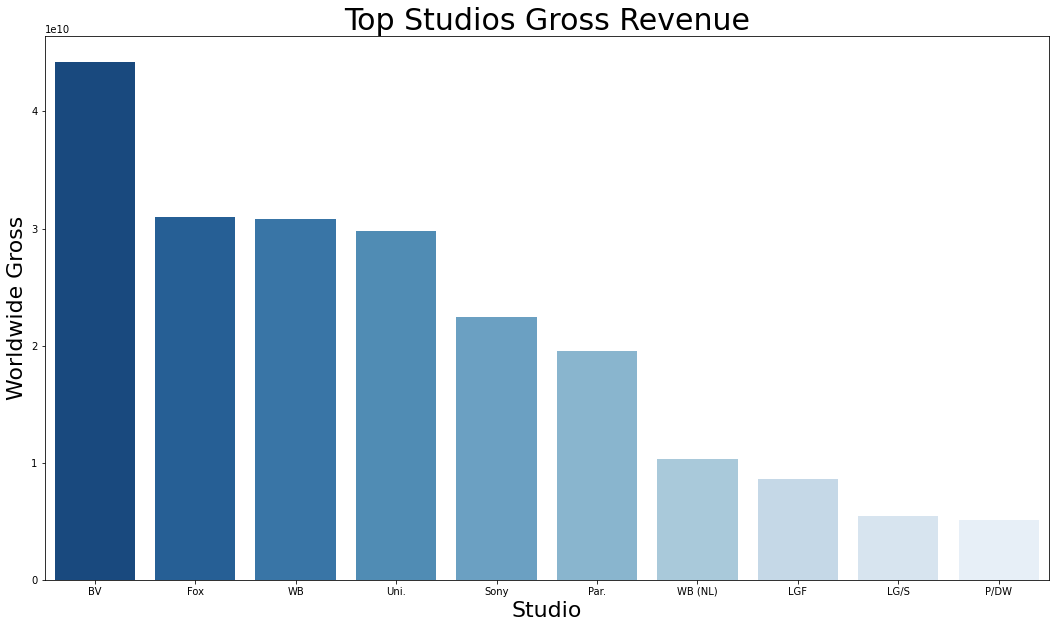

In [148]:
plt.figure(figsize = (18,10))
sns.barplot(y = top_studios["total_gross"], x = top_studios.index,
            palette="Blues_r")
plt.xlabel('Studio', fontsize=22)
plt.ylabel('Worldwide Gross', fontsize=22)
plt.title("Top Studios Gross Revenue", fontsize=30)
plt.savefig("Studio_Gross")

# Question 2: Which genres had the highest ROI?


In [104]:
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [152]:
basics_df = basics_df.dropna(subset=["genres"])
basics_df["genres"] = basics_df["genres"].map(lambda x: x.split(","))
med_runtime = basics_df["runtime_minutes"].median()
basics_df["runtime_minutes"].fillna(med_runtime, inplace=True)
basics_df["original_title"].fillna("primary_title", inplace=True)
basics_df.head()

# dropped missing genres
#changed genres to list
# filled in in missing rutime_minutes with median
# filled in original titles from primary titles

AttributeError: 'list' object has no attribute 'split'

In [106]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [107]:
#changing values to intergers
budgets_df["production_budget"] = budgets_df["production_budget"].str.replace(",", "")
budgets_df["production_budget"] = budgets_df["production_budget"].str.replace("$", "")
budgets_df["production_budget"] = budgets_df["production_budget"].astype(float)
budgets_df["domestic_gross"] = budgets_df["domestic_gross"].str.replace(",", "")
budgets_df["domestic_gross"] = budgets_df["domestic_gross"].str.replace("$", "")
budgets_df["domestic_gross"] = budgets_df["domestic_gross"].astype(float)
budgets_df["worldwide_gross"] = budgets_df["worldwide_gross"].str.replace(",", "")
budgets_df["worldwide_gross"] = budgets_df["worldwide_gross"].str.replace("$", "")
budgets_df["worldwide_gross"] = budgets_df["worldwide_gross"].astype(float)

In [108]:
budgets_df["ROI"] = ((budgets_df["worldwide_gross"] - budgets_df["production_budget"])
                     / budgets_df["production_budget"]) * 100

budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,315.369636


In [109]:
budgets_df2 = pd.merge(basics_df.reset_index(), budgets_df,
                      left_on=["primary_title"], right_on=["movie"])
budgets_df2.drop(["original_title", "runtime_minutes", "id", "start_year", "index"], axis=1)
budgets_df2 = budgets_df2.set_index("tconst")
budgets_df2.head()

,index,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
tconst,,,,,,,,,,,,,
tt0249516,20,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,-99.836209
tt0293429,33,Mortal Kombat,Mortal Kombat,2021,87.0,"[Action, Adventure, Fantasy]",10,"Aug 18, 1995",Mortal Kombat,20000000.0,70433227.0,122133227.0,510.666135
tt0337692,48,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]",17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,-62.746792
tt2404548,39490,On the Road,On the Road,2011,90.0,[Drama],17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,-62.746792
tt3872966,68078,On the Road,On the Road,2013,87.0,[Documentary],17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0,-62.746792


In [110]:
#check for duplicates
budgets_df2[budgets_df2.duplicated(subset = ["primary_title", "release_date"], keep=False)].sort_values(["primary_title", "release_date"]).sort_values(by = "primary_title").head()

,index,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
tconst,,,,,,,,,,,,,
tt2388621,38738,1982,1982,2013,90.0,[Drama],23,"Mar 1, 2016",1982,1000000.0,0.0,0.0,-100.000000
tt5671400,97230,1982,1982,2015,11.0,[Documentary],23,"Mar 1, 2016",1982,1000000.0,0.0,0.0,-100.000000
tt1517177,8573,3,3,2010,119.0,"[Comedy, Drama, Romance]",85,"Sep 16, 2011",3,7200000.0,59774.0,295492.0,-95.895944
tt2123129,29202,3,3,2012,145.0,"[Drama, Mystery, Romance]",85,"Sep 16, 2011",3,7200000.0,59774.0,295492.0,-95.895944
tt2379653,38370,3,3,2012,115.0,"[Comedy, Drama]",85,"Sep 16, 2011",3,7200000.0,59774.0,295492.0,-95.895944


In [111]:
#removing duplicates
budgets_df2 = budgets_df2[~budgets_df2.duplicated(
    subset = ["movie", "release_date"], keep=False)].sort_values(
    ["movie", "release_date"])
budgets_df2.head()

,index,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
tconst,,,,,,,,,,,,,
tt3526286,61037,#Horror,#Horror,2015,101.0,"[Crime, Drama, Horror]",16,"Nov 20, 2015",#Horror,1500000.0,0.0,0.0,-100.000000
tt1179933,5761,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]",54,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,72082999.0,108286422.0,2065.728440
tt3453052,59400,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,[Drama],48,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,14616.0,14616.0,-99.878200
tt3517850,60853,12 Rounds,12 Rounds,2017,87.0,"[Action, Drama, Romance]",37,"Mar 27, 2009",12 Rounds,20000000.0,12234694.0,17306648.0,-13.466760
tt1413492,7385,12 Strong,12 Strong,2018,130.0,"[Action, Drama, History]",64,"Jan 19, 2018",12 Strong,35000000.0,45819713.0,71118378.0,103.195366


In [112]:
budgets_df2 =budgets_df2.reset_index()
budgets_df2 = budgets_df2[budgets_df2["worldwide_gross"] > 0]
budgets_df2.head()
#removing rows where gross = 0. Don't know if these values were missing or if they did not release.
#Either way they will skew our data

,tconst,index,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
1,tt1179933,5761,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"[Drama, Horror, Mystery]",54,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,72082999.0,108286422.0,2065.728440
2,tt3453052,59400,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,[Drama],48,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,14616.0,14616.0,-99.878200
3,tt3517850,60853,12 Rounds,12 Rounds,2017,87.0,"[Action, Drama, Romance]",37,"Mar 27, 2009",12 Rounds,20000000.0,12234694.0,17306648.0,-13.466760
4,tt1413492,7385,12 Strong,12 Strong,2018,130.0,"[Action, Drama, History]",64,"Jan 19, 2018",12 Strong,35000000.0,45819713.0,71118378.0,103.195366
5,tt2024544,25709,12 Years a Slave,12 Years a Slave,2013,134.0,"[Biography, Drama, History]",18,"Oct 18, 2013",12 Years a Slave,20000000.0,56671993.0,181025343.0,805.126715


In [113]:
ROIq1 = budgets_df2["ROI"].quantile(0.25)
ROIq3 = budgets_df2["ROI"].quantile(0.75)
ROIiqr = ROIq3 - ROIq1
budgets_df2 = budgets_df2[budgets_df2["ROI"] < (ROIq3 + (ROIiqr*1.5))]
budgets_df2 = budgets_df2[budgets_df2["ROI"] > (ROIq1 - (ROIiqr*1.5))]
#removing outliers of ROI using IQR

In [115]:
budgets_df2.sort_values(by="ROI")

,tconst,index,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
509,tt2141739,29832,Food Chains,Food Chains,2014,83.0,[Documentary],36,"Nov 21, 2014",Food Chains,913000.0,0.0,176.0,-99.980723
248,tt2503954,41677,Broken Horses,Broken Horses,2015,101.0,"[Action, Crime, Drama]",62,"Sep 1, 2015",Broken Horses,15000000.0,0.0,3471.0,-99.976860
1664,tt1414378,7394,Tracker,Tracker,2010,102.0,"[Action, Adventure, Drama]",4,"Dec 31, 2011",Tracker,6500000.0,0.0,3149.0,-99.951554
637,tt2924392,49123,Higher Power,Higher Power,2018,93.0,"[Action, Sci-Fi, Thriller]",67,"May 11, 2018",Higher Power,500000.0,528.0,528.0,-99.894400
696,tt1844203,19937,Inescapable,Inescapable,2012,93.0,"[Action, Drama, Mystery]",53,"Feb 22, 2013",Inescapable,4000000.0,4327.0,4327.0,-99.891825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,tt1596365,10396,The Woman in Black,The Woman in Black,2012,95.0,"[Drama, Fantasy, Horror]",18,"Feb 3, 2012",The Woman in Black,15000000.0,54333290.0,128955898.0,759.705987
148,tt4849438,83932,Baahubali 2: The Conclusion,Baahubali 2: The Conclusion,2017,167.0,"[Action, Drama]",55,"Apr 28, 2017",Baahubali 2: The Conclusion,30000000.0,18985794.0,263502914.0,778.343047
1464,tt1155076,5701,The Karate Kid,The Karate Kid,2010,140.0,"[Action, Drama, Family]",77,"Jun 11, 2010",The Karate Kid,40000000.0,176591618.0,351774938.0,779.437345
946,tt2388715,38747,Oculus,Oculus,2013,104.0,"[Horror, Mystery]",72,"Apr 11, 2014",Oculus,5000000.0,27695246.0,44115496.0,782.309920


In [116]:
budgets_pow = budgets_df2.explode("genres")
genre_count = budgets_pow.groupby("genres")["tconst"].count().sort_values(ascending=False)
genre_count
#exploding genres so i can use grouping on list
#counting number of movies in each genre

genres
Drama          718
Comedy         489
Action         425
Adventure      344
Crime          223
Thriller       214
Romance        175
Horror         142
Sci-Fi         125
Biography      121
Fantasy        117
Mystery        105
Animation       95
Documentary     91
Family          90
Music           50
History         42
Sport           35
War             27
Western         11
Musical          9
News             1
Name: tconst, dtype: int64

In [117]:
genre_count = genre_count[genre_count > 50]
budgets_pow = budgets_pow[budgets_pow["genres"].isin(genre_count.index)]
#removing rows where there is a low occurrance of genre

In [118]:
genre_ROI = budgets_pow[["genres", "ROI"]].groupby("genres").mean().round(2)
genre_ROI = genre_ROI.sort_values(by="ROI", ascending=False)
genre_ROI
#finding mean ROI for each genre

,ROI
genres,
Animation,206.75
Sci-Fi,194.90
Adventure,177.44
Mystery,168.66
Family,155.89
Romance,155.19
Horror,154.44
Action,148.48
Comedy,147.04


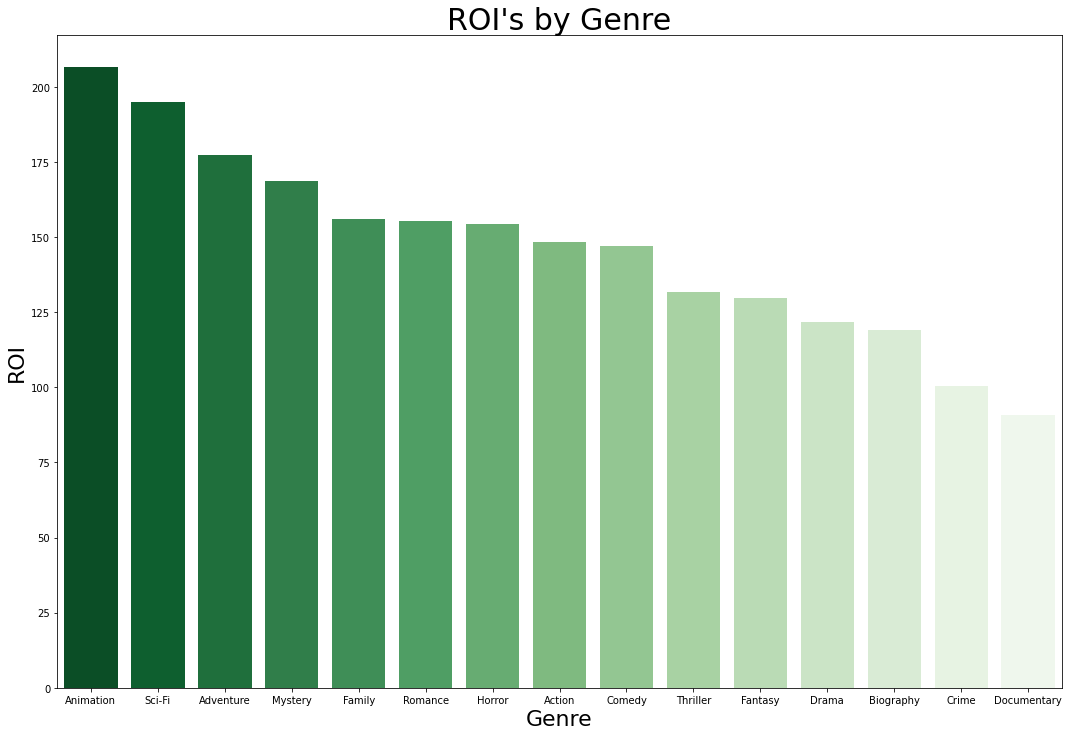

In [149]:
plt.figure(figsize = (18,12))
ax = sns.barplot(y = genre_ROI["ROI"], x = genre_ROI.index,
                palette="Greens_r")
plt.xlabel('Genre', fontsize=22)
plt.ylabel('ROI', fontsize=22)
plt.title("ROI's by Genre", fontsize=30)
plt.savefig("Genres_ROI")

# Question 2: Which directors are most popular? 

In [7]:
basics_df2 = basics_df
basics_df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


In [8]:
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
basics_df2.set_index("tconst", inplace = True)
title_ratings_df.set_index("tconst", inplace = True)
df1 = basics_df2.join(title_ratings_df, on = "tconst", how = "inner")
df1.head()
#df1.info()
# Joined basics and title dataframe


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"[Comedy, Drama]",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119


In [10]:
principals_df = principals_df[principals_df["category"] == "director"]
#only looking at diretors here so removing rest
principals_df.head()

,tconst,ordering,nconst,category,job,characters
1,tt0111414,2,nm0398271,director,NaN,NaN
8,tt0323808,5,nm0362736,director,NaN,NaN
18,tt0417610,5,nm1145057,director,NaN,NaN
28,tt0469152,5,nm0707738,director,NaN,NaN
35,tt0473032,3,nm0776090,director,NaN,NaN


In [11]:
principals_df.drop("characters", axis = 1, inplace=True)
principals_df.drop("job", axis = 1, inplace=True)
principals_df.drop("ordering", axis = 1, inplace=True)
principals_df.drop("category", axis = 1, inplace=True)
#dropping unneeded rows. Don't know why I had to do them individually

In [12]:
principals_df.head()

,tconst,nconst
1,tt0111414,nm0398271
8,tt0323808,nm0362736
18,tt0417610,nm1145057
28,tt0469152,nm0707738
35,tt0473032,nm0776090


In [13]:
name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [14]:
name_basics_df.drop("birth_year", axis = 1, inplace=True)
name_basics_df.drop("death_year", axis = 1, inplace=True)
name_basics_df.drop("primary_profession", axis = 1, inplace=True)
name_basics_df.drop("known_for_titles", axis = 1, inplace=True)
name_basics_df.head()

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


In [15]:
name_basics_df2.head()

NameError: name 'name_basics_df2' is not defined

In [16]:
name_basics_df2 = name_basics_df
principals_df2 = principals_df


In [17]:
name_basics_df2.set_index("nconst", inplace = True)
principals_df2.set_index("nconst", inplace = True)
df2 = name_basics_df2.join(principals_df2, on = "nconst", how = "inner")

In [18]:
df2.head()

,primary_name,tconst
nconst,,
nm0062879,Ruel S. Bayani,tt2057445
nm0062879,Ruel S. Bayani,tt1592569
nm0062879,Ruel S. Bayani,tt2590280
nm0062879,Ruel S. Bayani,tt8421806
nm0064023,Bryan Beasley,tt3501180


In [19]:
df2.reset_index(inplace = True)
df2.set_index("tconst", inplace = True)
df2.head()

,nconst,primary_name
tconst,,
tt2057445,nm0062879,Ruel S. Bayani
tt1592569,nm0062879,Ruel S. Bayani
tt2590280,nm0062879,Ruel S. Bayani
tt8421806,nm0062879,Ruel S. Bayani
tt3501180,nm0064023,Bryan Beasley


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146393 entries, tt2057445 to tt8743182
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   nconst        146393 non-null  object
 1   primary_name  146393 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


In [23]:
df3 = df1.join(df2, on = "tconst", how = "inner")
df3 = df3.sort_values(by= "numvotes", ascending=False)
df3.head()
#all tables are joined. Time to visualize data

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,nconst,primary_name
tconst,,,,,,,,,
tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066,nm0634240,Christopher Nolan
tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"[Action, Thriller]",8.4,1387769,nm0634240,Christopher Nolan
tt0816692,Interstellar,Interstellar,2014,169.0,"[Adventure, Drama, Sci-Fi]",8.6,1299334,nm0634240,Christopher Nolan
tt1853728,Django Unchained,Django Unchained,2012,165.0,"[Drama, Western]",8.4,1211405,nm0000233,Quentin Tarantino
tt0848228,The Avengers,The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655,nm0923736,Joss Whedon


In [34]:
top_directors = df3.groupby("primary_name")["numvotes"].sum().sort_values(ascending=False)
top_directors = top_directors[top_directors >= 1796023]
top_directors


primary_name
Christopher Nolan    4994749
Martin Scorsese      2422764
Joe Russo            2361915
Anthony Russo        2361820
Denis Villeneuve     2013951
Ridley Scott         1988493
Matthew Vaughn       1881600
Joss Whedon          1864664
Zack Snyder          1845493
David Yates          1796023
Name: numvotes, dtype: int64

In [126]:
df4 = df3[df3["primary_name"].isin(top_directors.index)].sort_values(
    by="averagerating", ascending= False)
df4

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,nconst,primary_name
tconst,,,,,,,,,
tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066,nm0634240,Christopher Nolan
tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"[Action, Adventure, Sci-Fi]",8.8,441135,nm0751577,Anthony Russo
tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"[Action, Adventure, Sci-Fi]",8.8,441135,nm0751648,Joe Russo
tt0816692,Interstellar,Interstellar,2014,169.0,"[Adventure, Drama, Sci-Fi]",8.6,1299334,nm0634240,Christopher Nolan
tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,nm0751577,Anthony Russo
tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,nm0751648,Joe Russo
tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"[Action, Thriller]",8.4,1387769,nm0634240,Christopher Nolan
tt1255953,Incendies,Incendies,2010,131.0,"[Drama, Mystery, War]",8.3,124156,nm0898288,Denis Villeneuve
tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"[Biography, Crime, Drama]",8.2,1035358,nm0000217,Martin Scorsese


In [40]:
director_avg = df4.groupby("primary_name")["averagerating"].mean().sort_values(ascending=False)
director_avg

primary_name
Christopher Nolan    8.425000
Anthony Russo        8.225000
Joe Russo            7.820000
Denis Villeneuve     7.800000
Martin Scorsese      7.657143
Joss Whedon          7.533333
Matthew Vaughn       7.450000
David Yates          7.200000
Zack Snyder          6.640000
Ridley Scott         6.585714
Name: averagerating, dtype: float64

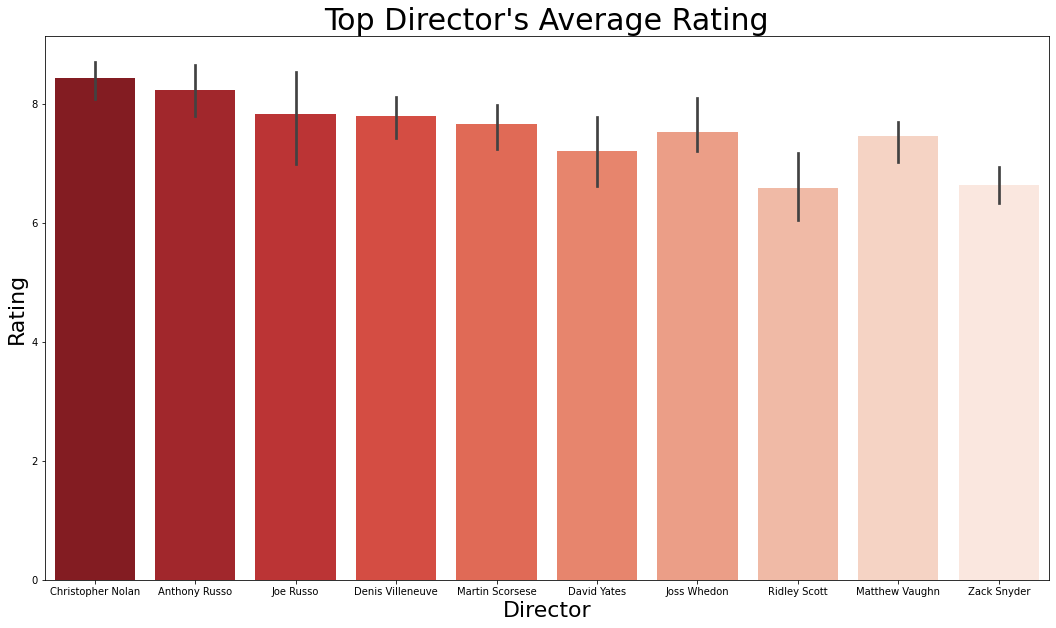

In [150]:
plt.figure(figsize = (18,10))
ax = sns.barplot(y = df4["averagerating"], x = df4["primary_name"],
                 palette="Reds_r")
plt.xlabel('Director', fontsize=22)
plt.ylabel('Rating', fontsize=22)
plt.title("Top Director's Average Rating", fontsize=30)
plt.savefig("Director_Ratings")
